# Proyecto final Simulación

Simulando una librería.
El objetivo es simular la vida de Michael.
Un librero que trabaja en la mejor librería del mundo: Ateneo Grand Splendid en Buenos Aires.
Él se encarga TODOS los días de ingresar libros en el sistema. Entre ellos, libros que se venden, libros alquilados y los propios claro. 
Michael calcula que en promedio, ingresa unos 20 libros al sistema por día. Ya que es un proceso super engorroso. También,  retorna de las mesas donde la gente lee un promedio de 50 libros al día. Y los que vende ascienden a unos 30. 
A veces, él quisiera vacaciones y piensa: "Ojalá supiera que tanto trabajo habrá en promedio para saber cuándo tomármelas". 

El proyecto, se trata de simular un día de Michael en el tiempo y calcular su mejor día de vacaciones. El periodo de tiempo es de 1 jornada laboral, es decir 1 día para cada iteración. Para cada situación se tomarán los siguientes valores.

* Venta de libros, **MU de 30**.
* Retorno de libros de mesas, **MU de 50**
* Ingreso de libros al sistema, **MU de 20**

Se realizarán simulaciones para las tres variables, a sabiendas de:
* Son eventos independientes ya que no influye si compran más, o menos que si alquilan más o menos que si ingresa más o menos. 
* Los tres experimentos mantienen el mismo margen de tiempo: 1 día equivale a 1 iteración. 

## Marco Teórico y Supuestos

Muchas veces es necesario recorrer exhaustivamente un conjunto de posibilidades para contar las que
satisfacían una propiedad, y así calcular probabilidades como el número de casos favorables dividido 
por el número de casos posibles. En algunos casos el número de posibilidades es enorme, y el resultado, 
realmente mucho más preciso de lo que necesitábamos.

Una alternativa consiste en calcular sólo unos cuantos casos extraídos aleatoriamente, y hacer una 
estadística de los casos favorables entre los posibles. 

Los **números aleatorios** permiten a los modelos matemáticos representar la realidad. En general cuando se requiere una impredecibilidad en unos determinados datos, se utilizan números aleatorios

Los seres humanos vivimos en un medio **aleatorio** y nuestro comportamiento lo es también. Si deseamos predecir el comportamiento de un material, de un fenómeno climatológico o de un grupo humano podemos inferir a partir de datos estadísticos. Para lograr una mejor aproximación a la realidad nuestra herramienta predictiva debe funcionar de manera similar: aleatoriamente. De esa necesidad surgieron los modelos de simulación.

## Implementación

### Primera variable: libros vendidos

En esta sección se tomarán en cuenta los libros que Michael vende diario. Estos libros son los que quizás le toman más tiempo. Pero usaremos los siguientes valores:
* MU: 30
* Iteraciones: 365

#### Algoritmo #1

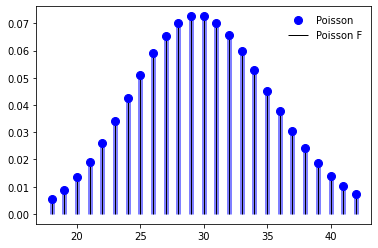

In [7]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
#dibujamos los subplots
fig, ax = plt.subplots(1, 1)


mu = 30
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='Poisson')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)


rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='Poisson F')
ax.legend(loc='best', frameon=False)
plt.show()

Este primer algoritmo muestra una distribución irrealista y totalmente perfecta. Donde los 30 libros ocupan el centro de la gráfica. Ahora apliquemos algo de realidad.

#### Algoritmo #2

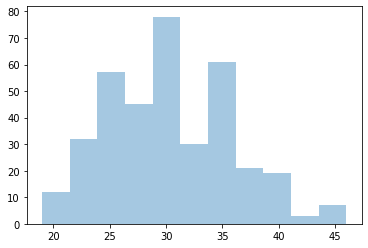

In [8]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
# simulamos
MUValue= 30
Iteraciones= 365
sns.distplot(random.poisson(lam=MUValue, size=Iteraciones), kde=False)

plt.show()

Notamos un fuerte agrupamiento cerca de los 30. Podríamos colocar una incertidumbre de +-8 libros. 

#### Algoritmo #3

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

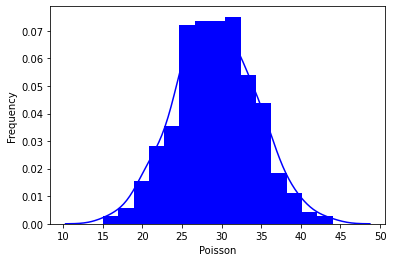

In [5]:
from scipy.stats import poisson
import seaborn as sb
#subimos las iteraciones
data_binom = poisson.rvs(mu=30, size=365)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

Ahora los valores son apegados a la normalidad y hay más probabilidad. Ahora en el tiempo.

EVENT_NUM,INTER_EVENT_T,EVENT_T
Iteración: 0,  Tiempo del evento: 0.03982987767047705,  VALOR: 0.03982987767047705
Iteración: 1,  Tiempo del evento: 0.017574177215690535,  VALOR: 0.05740405488616758
Iteración: 2,  Tiempo del evento: 0.006575508928004279,  VALOR: 0.06397956381417186
Iteración: 3,  Tiempo del evento: 0.03991417050149283,  VALOR: 0.10389373431566469
Iteración: 4,  Tiempo del evento: 0.018216419353264277,  VALOR: 0.12211015366892897
Iteración: 5,  Tiempo del evento: 0.012159844291355455,  VALOR: 0.1342699979602844
Iteración: 6,  Tiempo del evento: 0.07387534337714231,  VALOR: 0.20814534133742674
Iteración: 7,  Tiempo del evento: 0.12929273451383788,  VALOR: 0.3374380758512646
Iteración: 8,  Tiempo del evento: 0.04293561217377884,  VALOR: 0.38037368802504345
Iteración: 9,  Tiempo del evento: 0.061800060245506265,  VALOR: 0.4421737482705497
Iteración: 10,  Tiempo del evento: 0.016101711887738852,  VALOR: 0.4582754601582886
Iteración: 11,  Tiempo del evento: 0.072157776252543

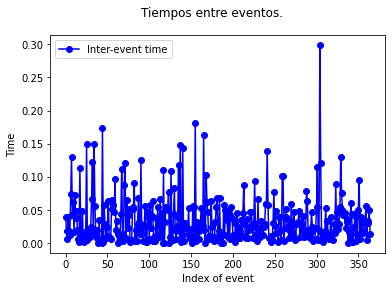

INTERVAL_NUM,NUM_EVENTS
MEDIA de EVENTOS
29.166666666666668


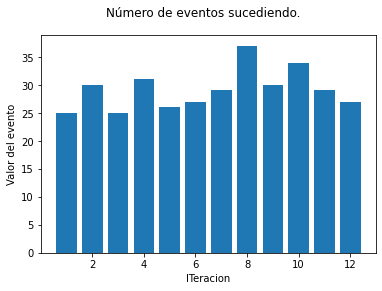

In [9]:

import random
import math
import statistics
import matplotlib.pyplot as plt


_lambda = 30
_num_events = 365
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#se obtiene un raondom
	n = random.random()

	#se genera el evento
	_inter_event_time = -math.log(1.0 - n) / _lambda
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	print("Iteración: " + str(i) +',  Tiempo del evento: ' + str(_inter_event_time) + ',  VALOR: ' + str(_event_time))

#se plotean los inter eventos
fig = plt.figure()
fig.suptitle('Tiempos entre eventos.')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		#print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#se imprime la media
print("MEDIA de EVENTOS")
print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Número de eventos sucediendo.')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('ITeracion')
plt.ylabel('Valor del evento')
plt.show()

### Segunda variable: libros recolocados en estanterías

En esta sección se tomarán en cuenta los libros que Michael recoloca diario. Pero usaremos los siguientes valores:
* MU: 50
* Iteraciones: 365

Algoritmo #1

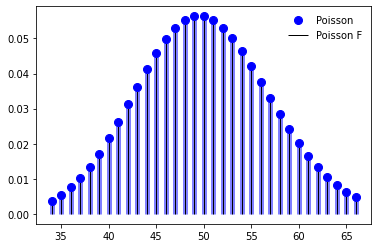

In [10]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
#dibujamos los subplots
fig, ax = plt.subplots(1, 1)


mu = 50
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='Poisson')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)


rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='Poisson F')
ax.legend(loc='best', frameon=False)
plt.show()

Algoritmo #2

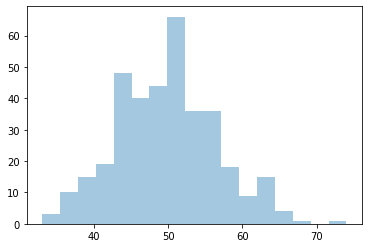

In [11]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
# simulamos
MUValue= 50
Iteraciones= 365
sns.distplot(random.poisson(lam=MUValue, size=Iteraciones), kde=False)

plt.show()

Algoritmo #3

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

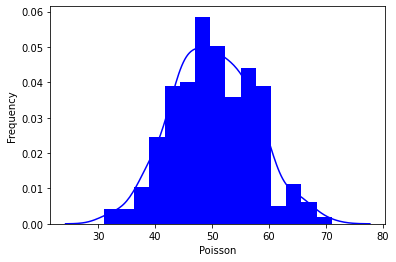

In [13]:
from scipy.stats import poisson
import seaborn as sb
#subimos las iteraciones
data_binom = poisson.rvs(mu=50, size=365)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

Algoritmo #4

EVENT_NUM,INTER_EVENT_T,EVENT_T
Iteración: 0,  Tiempo del evento: 0.003961088640699707,  VALOR: 0.003961088640699707
Iteración: 1,  Tiempo del evento: 0.0069348869489675655,  VALOR: 0.010895975589667272
Iteración: 2,  Tiempo del evento: 0.02902096254159941,  VALOR: 0.03991693813126668
Iteración: 3,  Tiempo del evento: 0.004390201687250402,  VALOR: 0.04430713981851708
Iteración: 4,  Tiempo del evento: 0.11631920769871225,  VALOR: 0.16062634751722932
Iteración: 5,  Tiempo del evento: 0.03674052316294413,  VALOR: 0.19736687068017345
Iteración: 6,  Tiempo del evento: 0.0016644204843183836,  VALOR: 0.19903129116449184
Iteración: 7,  Tiempo del evento: 0.003696856873943535,  VALOR: 0.20272814803843536
Iteración: 8,  Tiempo del evento: 0.0065074114092738234,  VALOR: 0.2092355594477092
Iteración: 9,  Tiempo del evento: 0.022638570446779832,  VALOR: 0.23187412989448902
Iteración: 10,  Tiempo del evento: 0.05191494042260867,  VALOR: 0.2837890703170977
Iteración: 11,  Tiempo del evento: 0.0281128

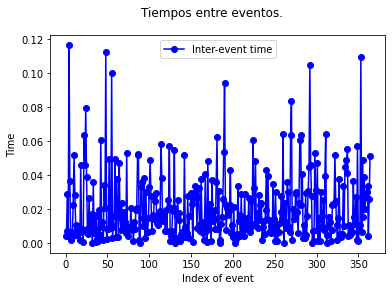

INTERVAL_NUM,NUM_EVENTS
MEDIA de EVENTOS
49.714285714285715


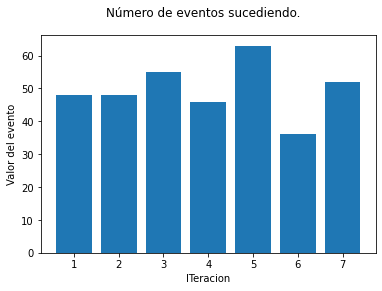

In [16]:
import random
import math
import statistics
import matplotlib.pyplot as plt


_lambda = 50
_num_events = 365
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#se obtiene un raondom
	n = random.random()

	#se genera el evento
	_inter_event_time = -math.log(1.0 - n) / _lambda
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	print("Iteración: " + str(i) +',  Tiempo del evento: ' + str(_inter_event_time) + ',  VALOR: ' + str(_event_time))

#se plotean los inter eventos
fig = plt.figure()
fig.suptitle('Tiempos entre eventos.')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		#print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#se imprime la media
print("MEDIA de EVENTOS")
print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Número de eventos sucediendo.')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('ITeracion')
plt.ylabel('Valor del evento')
plt.show()

### Tercera variable: libros ingresados al sistema

En esta sección se tomarán en cuenta los libros que Michael ingresa diario al sistema. Estos libros son los que quizás le toman más tiempo. Pero usaremos los siguientes valores:
* MU: 20
* Iteraciones: 365

Algoritmo #1

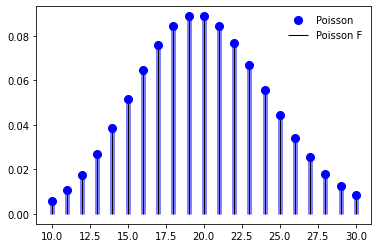

In [17]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
#dibujamos los subplots
fig, ax = plt.subplots(1, 1)


mu = 20
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='Poisson')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)


rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='Poisson F')
ax.legend(loc='best', frameon=False)
plt.show()

Algoritmo #2


[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

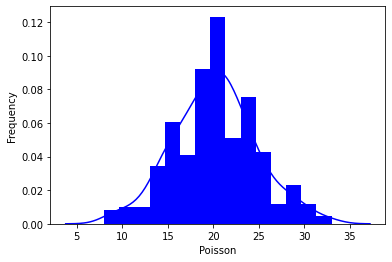

In [19]:
from scipy.stats import poisson
import seaborn as sb
#subimos las iteraciones
data_binom = poisson.rvs(mu=20, size=365)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

Algoritmo #3

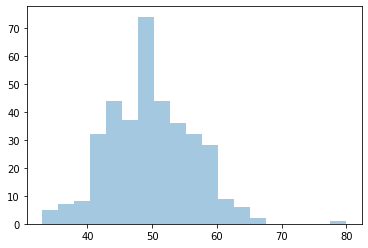

In [20]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
# simulamos
MUValue= 50
Iteraciones= 365
sns.distplot(random.poisson(lam=MUValue, size=Iteraciones), kde=False)

plt.show()

Algoritmo #4

EVENT_NUM,INTER_EVENT_T,EVENT_T
Iteración: 0,  Tiempo del evento: 0.00021373397033424435,  VALOR: 0.00021373397033424435
Iteración: 1,  Tiempo del evento: 0.009959529530750529,  VALOR: 0.010173263501084773
Iteración: 2,  Tiempo del evento: 0.016879720759803638,  VALOR: 0.02705298426088841
Iteración: 3,  Tiempo del evento: 0.034591333150872455,  VALOR: 0.061644317411760866
Iteración: 4,  Tiempo del evento: 0.00201826242024056,  VALOR: 0.06366257983200142
Iteración: 5,  Tiempo del evento: 0.004291226215789763,  VALOR: 0.0679538060477912
Iteración: 6,  Tiempo del evento: 0.006406405536352186,  VALOR: 0.07436021158414338
Iteración: 7,  Tiempo del evento: 0.007770392369944751,  VALOR: 0.08213060395408814
Iteración: 8,  Tiempo del evento: 0.00840820204033195,  VALOR: 0.09053880599442009
Iteración: 9,  Tiempo del evento: 0.02602940533642625,  VALOR: 0.11656821133084634
Iteración: 10,  Tiempo del evento: 0.015008520657677986,  VALOR: 0.13157673198852432
Iteración: 11,  Tiempo del evento: 0.030

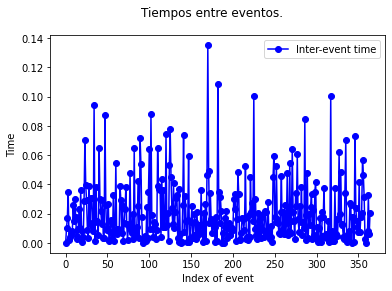

INTERVAL_NUM,NUM_EVENTS
MEDIA de EVENTOS
49.714285714285715


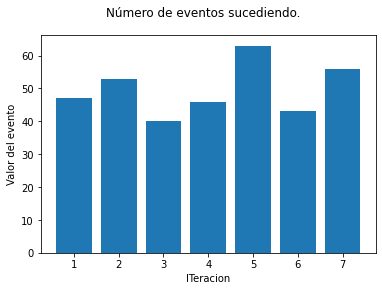

In [21]:
import random
import math
import statistics
import matplotlib.pyplot as plt


_lambda = 50
_num_events = 365
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#se obtiene un raondom
	n = random.random()

	#se genera el evento
	_inter_event_time = -math.log(1.0 - n) / _lambda
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	print("Iteración: " + str(i) +',  Tiempo del evento: ' + str(_inter_event_time) + ',  VALOR: ' + str(_event_time))

#se plotean los inter eventos
fig = plt.figure()
fig.suptitle('Tiempos entre eventos.')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		#print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#se imprime la media
print("MEDIA de EVENTOS")
print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Número de eventos sucediendo.')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('ITeracion')
plt.ylabel('Valor del evento')
plt.show()

## Resultados

## Referencias

* https://gist.github.com/sachinsdate/d48abefe2f75541c7d98f51599c927b0#file-poisson_sim-py
* https://www.w3schools.com/python/numpy_random_poisson.asp
* https://www.tutorialspoint.com/python_data_science/python_poisson_distribution.htm
* https://stackoverflow.com/questions/17192158/nameerror-global-name-xrange-is-not-defined-in-python-3
* http://www.estadisticaparatodos.es/taller/aleatorios/aleatorios.html